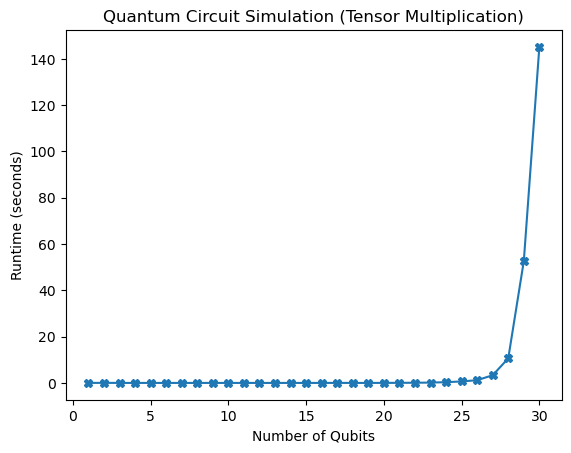

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Defining single-qubit gates
X = np.array([[0, 1], [1, 0]])  # Pauli X gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate

# Defining two-qubit CNOT gate-flips target qubit if control qubit is 1
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def create_initial_tensor_state(num_qubits): # creating a function that takes one input parameter
    state = np.zeros([2] * num_qubits) # creates array filled with zeros with num qubit no of elements having each qubit having state 0 or 1
    state[(0,) * num_qubits] = 1  # creates a tuple with numqubits elements all of which are zeros
    return state

def apply_single_qubit_gate(state, gate, qubit, num_qubits): # defining a function were applying a gate to single qubit 
    axes = ([1], [qubit])  # axes- specify how the gate matrix and the state tensor will be multiplied along a shared axis
    # [1] - represents second axis of gate matrix. [qubit]- Refers to the axis of the state tensor corresponding to the target qubit
    # above line ensures that the gate's second axis (1) aligns with the qubit axis in the state tensor when they are multiplied.
    state = np.tensordot(gate, state, axes=(1, qubit)) # Contract two tensors along specified axis, state- multi dimensional tensor representing state of the system
    #multiplies the gate matrix with the part of the state tensor that corresponds to the selected qubit, modifies target and leaves other unchanged
    # Move the resulting tensor axes into correct positions
    
    axes_order = list(range(1, qubit + 1)) + [0] + list(range(qubit + 1, num_qubits)) # after applying tensordot the resulting tensor may have axes shuffled 
    # this line constructs the correct axis order to maintain the original structure of the quantum state tensor
    # list(range(1, qubit + 1)) - list of integers from 1 to qubit, [0]- inserts 0 into the list at this position, [0] also corresponds to dimension of  the gate result after contrction
    # list(range(qubit + 1, num_qubits) - creates a lisit of integers from qb+1 to numqubits, axes order ensures gate modified axis placed in the correct position
    state = np.transpose(state, axes_order) # permutes the axes of the state tensor to match with the qubit order needed
    # np.transpose() -rearranges the axes of a multi-dimensional tensor

    return state

def apply_two_qubit_gate(state, gate, control, target, num_qubits):
    # Reshaping the gate to apply it to two qubit axes
    gate_tensor = gate.reshape([2, 2, 2, 2])# converts 4*4 gate matrix into rank 4 tensor, first two axes i/p last to axes o/p
    state = np.tensordot(gate_tensor, state, axes=([2, 3], [control, target])) # np.tensordot- multiplies gate tensor with state tensor along specific axes
    # [2, 3] Refers to the last two axes of the gate tensor, these are the output dimensions of the gate acting on the two qubits
    # Adjust the tensor's axes to maintain qubit order ,[control, target] axes of the state tensor corresponding to the control and target qubits, where the gate is applied.
    # gate tensor is multiplied with the state tensor updating the control and target qubits while leaving the other qubits unaffected
    
    axes_order = list(range(num_qubits)) # create sequence of integers from 0 to num qubits-1
    axes_order.remove(control) # removing control qubit
    axes_order.remove(target) # removing target qubit
    axes_order = [0, 1] + axes_order # [0, 1] represents the new first two axes of the tensor, correspond to the control and target qubits, respectively
    # adds the remaining axes to the end of the new list
    state = np.transpose(state, axes_order) # reorders the axes of the state tensor according to the new axes-order
    # ensures the control and target qubits in the correct position, ie first two axes by maintaning the correct qubit structure
    return state

def simulate_tensor_circuit(num_qubits):
    state = create_initial_tensor_state(num_qubits) # creates initial quantum system where all qubits in  state
    
    # Apply Hadamard to qubit 0
    state = apply_single_qubit_gate(state, H, 0, num_qubits)
    
    # Apply X to qubit 1 (only if there's at least 2 qubits)
    if num_qubits > 1:
        state = apply_single_qubit_gate(state, X, 1, num_qubits)
    
    # Applying CNOT gate (control: qubit 0, target: qubit 1)
    if num_qubits >= 2:
        state = apply_two_qubit_gate(state, CNOT, 0, 1, num_qubits)
    
    return state

# Measure runtime as a function of qubits
qubits = list(range(1,31))
runtimes = []

for n in qubits:
    start_time = time.time()
    simulate_tensor_circuit(n)
    runtimes.append(time.time() - start_time)

# Plot the runtime
plt.plot(qubits, runtimes, marker='X')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Quantum Circuit Simulation (Tensor Multiplication)')
plt.show()


In [2]:
def sample_tensor_state(state_tensor, num_samples=1000):
    state_vector = state_tensor.flatten() # flattening the tensor to a 1D vector
    # Calculating probabilities from amplitudes
    probabilities = np.abs(state_vector) ** 2
    possible_states = np.arange(len(state_vector))
    samples = np.random.choice(possible_states, size=num_samples, p=probabilities) # performing sampling
    return samples
final_tensor_state = simulate_tensor_circuit(2)
samples = sample_tensor_state(final_tensor_state)
print(samples)


[1 1 2 1 1 1 2 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 1 2 2 1 1 1 1 1 2 2 2
 1 1 2 2 2 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 1 1 2
 2 1 2 1 2 1 2 1 1 2 2 1 2 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 1
 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1 2 2 2 1 1 1 2 1 1 1
 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 2 2 2 1 1 2 1 2 1 2 2 2 2 1 1
 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 2 2 1 2 1 2 2 1 2 1 1 1
 2 2 1 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2
 1 1 2 1 1 2 1 1 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 1 1 2 1 2 2 2 1 1 1
 2 2 2 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2
 1 2 1 2 2 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 2
 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1
 2 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 1 1 1 2 2 1 1 2 2 1 2
 1 1 2 1 1 1 2 1 1 2 1 2 

In [9]:
import numpy as np

# Define Pauli-Z gate
Z = np.array([[1, 0], [0, -1]])  # Pauli-Z gate

def compute_tensor_expectation_value(state_tensor, operator):
    state_vector = state_tensor.flatten() # flattening the tensor to match the operator dimensions

    # COMPUTING EXPECTATION
    expectation_value = np.dot(np.conj(state_vector), np.dot(operator, state_vector))
    return expectation_value

def simulate_tensor_circuit(num_qubits):
    state = np.zeros([2] * num_qubits) # Initializing the state tensor to all zeros except |0...0>
    state[(0,) * num_qubits] = 1  # State |0...0>
    
    H = np.array([[1, 1], [1, -1]]) / np.sqrt(2) # applying Hadamard gate to the first qubit
    state = np.tensordot(H, state, axes=(1, 0))
    return state
state_tensor = simulate_tensor_circuit(1)  # Tensor for 1 qubit
expectation = compute_tensor_expectation_value(state_tensor, Z)
print(f"Expectation value: {expectation}")


Expectation value: 0.0
